# Lab 2 - ANNDA

In [25]:
import rbf
import mlp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# RBF

## Sine/Square

### Sine Function

In [2]:
# Generate data
x_range = [0,2*np.pi]
step = 0.1
variance = 0.1
N = int((x_range[1]-x_range[0])/step)
X_train = np.array([[step*i for i in range(N)]])
X_test = np.array([[0.05 + step*i for i in range(N)]])
f_train = np.array(rbf.sample_f(X_train,rbf.sin,0))
f_train_noisy = np.array(rbf.sample_f(X_train,rbf.sin,variance))
f_test = np.array(rbf.sample_f(X_test,rbf.sin,0))
f_test_noisy = np.array(rbf.sample_f(X_train,rbf.sin,variance))

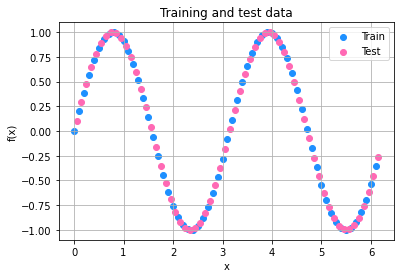

In [3]:
# Plot generated data
rbf.plot_data(X_train,X_test,f_train,f_test)

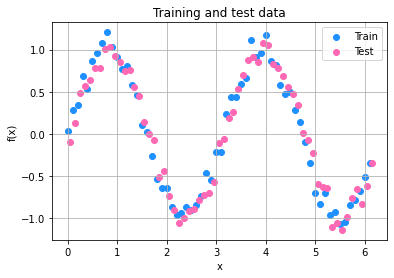

In [4]:
# Plot generated noisy data
rbf.plot_data(X_train,X_test,f_train_noisy,f_test_noisy)

In [5]:
# Define RBF Network Architecture
arch = [
    1, # Input dimensionality
    8, # Nodes per hidden layer
    1  # Output dimensionality
]
n = arch[1]
lr = 0.05
n_epochs = 100

In [6]:
# Create RBF Network
rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)

### Least Squares

In [7]:
# Initialize weigths
rbfnet.initialize_weights()

In [8]:
# Initialize RBF params
step = (x_range[1]-x_range[0])/n
sigmas = np.array([[1 for i in range(n)]]).T
mus = np.array([np.array([step/2 + step*i for i in range(n)])]).T
rbfnet.initialize_rad_basis_fns(mus,sigmas)

In [9]:
# Train weights with LS method
rbfnet.least_squares(X_train,f_train_noisy)

In [10]:
# Approximate function samples
f_train_pred = rbfnet.forward_pass(X_train).T
f_test_pred = rbfnet.forward_pass(X_test).T

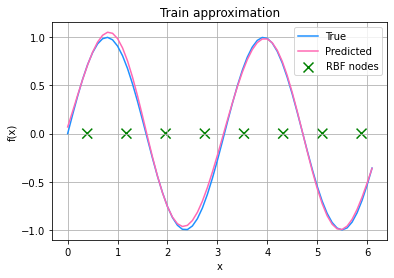

In [11]:
# Plot predicted vs actual output
title = 'Train approximation'
rbf.plot_series(rbfnet,X_train.T,f_train.T,f_train_pred.T,title)

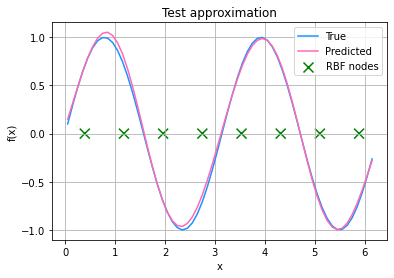

In [12]:
# Plot predicted vs actual output
title = 'Test approximation'
rbf.plot_series(rbfnet,X_test.T,f_test.T,f_test_pred.T,title)

In [13]:
# Compute residual error
res_error = rbf.residual_error(f_test,f_test_pred)
res_error

0.02791578567157557

### Delta Rule

In [14]:
# Initialize weigths
rbfnet.initialize_weights()

In [15]:
# Initialize RBF params
step = (x_range[1]-x_range[0])/n
sigmas = np.array([[1 for i in range(n)]]).T
mus = np.array([[step/2 + step*i for i in range(n)]]).T
rbfnet.initialize_rad_basis_fns(mus,sigmas)

In [16]:
# Train weights with Delta Rule method
res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train,X_test,f_test,n_epochs)

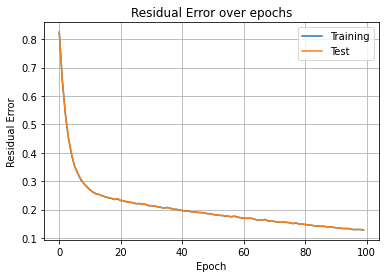

In [17]:
# Plot learning curves
rbf.plot_error(res_error_epochs,res_error_epochs_test,'Residual Error')

In [18]:
# Approximate function samples
f_train_pred = rbfnet.forward_pass(X_train).T
f_test_pred = rbfnet.forward_pass(X_test).T

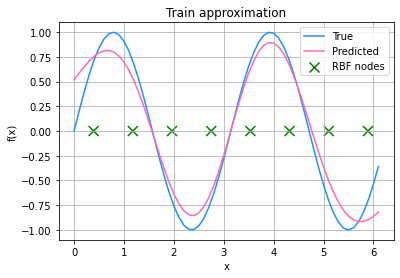

In [19]:
# Plot predicted vs actual output
title = 'Train approximation'
rbf.plot_series(rbfnet,X_train.T,f_train.T,f_train_pred.T,title)

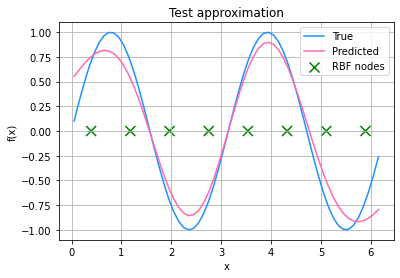

In [20]:
# Plot predicted vs actual output
title = 'Test approximation'
rbf.plot_series(rbfnet,X_test.T,f_test.T,f_test_pred.T,title)

In [21]:
# Compute residual error
res_error = rbf.residual_error(f_test,f_test_pred)
res_error

0.12846549679941166

### Competitive Learning

In [22]:
# Initialize weigths
rbfnet.initialize_weights()

In [23]:
# Initialize and train RBF params
step = (x_range[1]-x_range[0])/n
sigmas = np.array([[1 for i in range(n)]]).T
mus = np.array([np.random.choice(X_train.reshape(-1),size=n,replace=False)]).T
rbfnet.initialize_rad_basis_fns(np.copy(mus),np.copy(sigmas))
rbfnet.winner_takes_all(X_train,lr,unique_winner=False)

In [24]:
# Train weights with Delta Rule method
res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train,X_test,f_test,n_epochs)

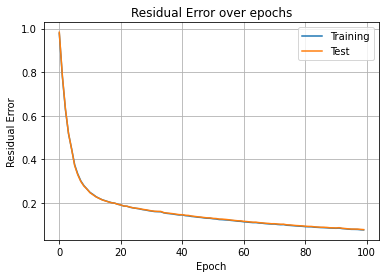

In [25]:
# Plot learning curves
rbf.plot_error(res_error_epochs,res_error_epochs_test,'Residual Error')

In [26]:
# Approximate function samples
f_train_pred = rbfnet.forward_pass(X_train).T
f_test_pred = rbfnet.forward_pass(X_test).T

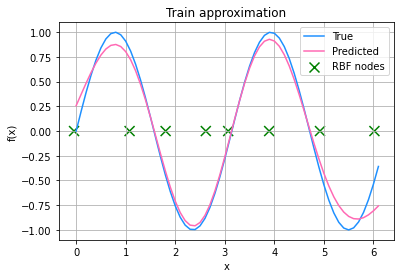

In [27]:
# Plot predicted vs actual output
title = 'Train approximation'
rbf.plot_series(rbfnet,X_train.T,f_train.T,f_train_pred.T,title)

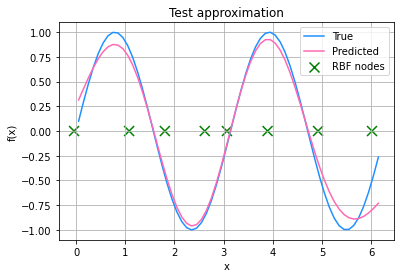

In [28]:
# Plot predicted vs actual output
title = 'Test approximation'
rbf.plot_series(rbfnet,X_test.T,f_test.T,f_test_pred.T,title)

In [29]:
# Compute residual error
res_error = rbf.residual_error(f_test,f_test_pred)
res_error

0.07693021542160955

### Comparison of Setups

In [106]:
# Comparison for Noisy Data
batch_res_errors, batch_res_errors_test = [],[]
seq_res_errors, seq_res_errors_test = [],[]
mlp_res_errors, mlp_res_errors_test = [],[]
archs, sigmas_used = [], []
ns = [2,4,8,16,32]
fixed_sigmas = [0.1,0.2,0.4,0.8,1.6]
lr = 0.05
n_epochs = 200
for n in ns :
    for sigma in fixed_sigmas :
        # Define RBF Network Architecture
        arch = [1,n,1]
        archs.append(str(arch[0])+'+'+str(arch[1])+'+'+str(arch[2]))
        sigmas_used.append(sigma)
        # Create RBF Network
        rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)
        # Initialize RBF params
        step = (x_range[1]-x_range[0])/n
        sigmas = np.array([[sigma for i in range(n)]]).T
        mus = np.array([[step/2 + step*i for i in range(n)]]).T
        rbfnet.initialize_rad_basis_fns(mus,sigmas)
        # Train weights with LS method
        rbfnet.initialize_weights()
        rbfnet.least_squares(X_train,f_train_noisy)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        batch_res_errors.append(rbf.residual_error(f_train,f_train_pred))
        batch_res_errors_test.append(rbf.residual_error(f_test,f_test_pred))
        # Train weights with Delta Rule method
        rbfnet.initialize_weights()
        res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train_noisy,X_test,f_test,n_epochs)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        seq_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        seq_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))
        # Train weights with MLP
        ann = mlp.NeuralNetwork(arch, mlp.activation_fn, mlp.activation_fn_der, True, 0.9, lr, n_epochs)
        ann.initialize_weights()
        epoch_mses, epoch_mses_valid = ann.train(X_train,f_train_noisy,X_test,f_test_noisy)
        # Approximate function samples
        f_train_pred = ann.forward_pass(X_train)
        f_test_pred = ann.forward_pass(X_test)
        # Append residual errors
        mlp_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        mlp_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))

In [107]:
# Comparison results
data = np.array([archs,sigmas_used,batch_res_errors,batch_res_errors_test,seq_res_errors,seq_res_errors_test,mlp_res_errors,mlp_res_errors_test]).T
df = pd.DataFrame(data,columns = ['arch','sigma','batch','batch_t','seq','seq_t','mlp','mlp_t'])
df = df.set_index(['arch', 'sigma'])
df = df.apply(pd.to_numeric)
df.style.background_gradient(cmap='YlOrRd',axis=None)

In [108]:
# Comparison for non-Noisy Data
batch_res_errors, batch_res_errors_test = [],[]
seq_res_errors, seq_res_errors_test = [],[]
mlp_res_errors, mlp_res_errors_test = [],[]
archs, sigmas_used = [], []
ns = [2,4,8,16,32]
fixed_sigmas = [0.1,0.2,0.4,0.8,1.6]
lr = 0.05
n_epochs = 200
for n in ns :
    for sigma in fixed_sigmas :
        # Define RBF Network Architecture
        arch = [1,n,1]
        archs.append(str(arch[0])+'+'+str(arch[1])+'+'+str(arch[2]))
        sigmas_used.append(sigma)
        # Create RBF Network
        rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)
        # Initialize RBF params
        step = (x_range[1]-x_range[0])/n
        sigmas = np.array([[sigma for i in range(n)]]).T
        mus = np.array([[step/2 + step*i for i in range(n)]]).T
        rbfnet.initialize_rad_basis_fns(mus,sigmas)
        # Train weights with LS method
        rbfnet.initialize_weights()
        rbfnet.least_squares(X_train,f_train)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        batch_res_errors.append(rbf.residual_error(f_train,f_train_pred))
        batch_res_errors_test.append(rbf.residual_error(f_test,f_test_pred))
        # Train weights with Delta Rule method
        rbfnet.initialize_weights()
        res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train,X_test,f_test,n_epochs)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        seq_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        seq_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))
        # Train weights with MLP
        ann = mlp.NeuralNetwork(arch, mlp.activation_fn, mlp.activation_fn_der, True, 0.9, lr, n_epochs)
        ann.initialize_weights()
        epoch_mses, epoch_mses_valid = ann.train(X_train,f_train,X_test,f_test_noisy)
        # Approximate function samples
        f_train_pred = ann.forward_pass(X_train)
        f_test_pred = ann.forward_pass(X_test)
        # Append residual errors
        mlp_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        mlp_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))

In [109]:
# Comparison results
data = np.array([archs,sigmas_used,batch_res_errors,batch_res_errors_test,seq_res_errors,seq_res_errors_test,mlp_res_errors,mlp_res_errors_test]).T
df = pd.DataFrame(data,columns = ['arch','sigma','batch','batch_t','seq','seq_t','mlp','mlp_t'])
df = df.set_index(['arch', 'sigma'])
df = df.apply(pd.to_numeric)
df.style.background_gradient(cmap='YlOrRd',axis=None)

In [140]:
# Comparison for Noisy Data - Assign RBF centers randomly
batch_res_errors, batch_res_errors_test = [],[]
seq_res_errors, seq_res_errors_test = [],[]
mlp_res_errors, mlp_res_errors_test = [],[]
archs, sigmas_used = [], []
ns = [2,4,8,16,32]
fixed_sigmas = [0.1,0.2,0.4,0.8,1.6]
lr = 0.05
n_epochs = 200
for n in ns :
    for sigma in fixed_sigmas :
        # Define RBF Network Architecture
        arch = [1,n,1]
        archs.append(str(arch[0])+'+'+str(arch[1])+'+'+str(arch[2]))
        sigmas_used.append(sigma)
        # Create RBF Network
        rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)
        # Initialize RBF params
        sigmas = np.array([[sigma for i in range(n)]]).T
        mus = np.array([np.random.choice(X_train.reshape(-1),size=n,replace=False)]).T
        rbfnet.initialize_rad_basis_fns(mus,sigmas)
        # Train weights with LS method
        rbfnet.initialize_weights()
        rbfnet.least_squares(X_train,f_train_noisy)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        batch_res_errors.append(rbf.residual_error(f_train,f_train_pred))
        batch_res_errors_test.append(rbf.residual_error(f_test,f_test_pred))
        # Train weights with Delta Rule method
        rbfnet.initialize_weights()
        res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train_noisy,X_test,f_test,n_epochs)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        seq_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        seq_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))
        # Train weights with MLP
        ann = mlp.NeuralNetwork(arch, mlp.activation_fn, mlp.activation_fn_der, True, 0.9, lr, n_epochs)
        ann.initialize_weights()
        epoch_mses, epoch_mses_valid = ann.train(X_train,f_train_noisy,X_test,f_test_noisy)
        # Approximate function samples
        f_train_pred = ann.forward_pass(X_train)
        f_test_pred = ann.forward_pass(X_test)
        # Append residual errors
        mlp_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        mlp_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))

In [141]:
# Comparison results
data = np.array([archs,sigmas_used,batch_res_errors,batch_res_errors_test,seq_res_errors,seq_res_errors_test,mlp_res_errors,mlp_res_errors_test]).T
df = pd.DataFrame(data,columns = ['arch','sigma','batch','batch_t','seq','seq_t','mlp','mlp_t'])
df = df.set_index(['arch', 'sigma'])
df = df.apply(pd.to_numeric)
df.style.background_gradient(cmap='YlOrRd',axis=None)

In [32]:
# Comparison for Noisy and non-Noisy Data - Assign RBF centers with and without CL
seq_res_errors, seq_res_errors_test = [],[]
seq_res_errors_noisy, seq_res_errors_test_noisy = [],[]
seq_res_errors_cl, seq_res_errors_test_cl = [],[]
seq_res_errors_noisy_cl, seq_res_errors_test_noisy_cl = [],[]
archs, sigmas_used = [], []
ns = [2,4,8,16,32]
fixed_sigmas = [0.1,0.2,0.4,0.8,1.6]
lr = 0.05
n_epochs = 200
for n in ns :
    for sigma in fixed_sigmas :
        # Define RBF Network Architecture
        arch = [1,n,1]
        archs.append(str(arch[0])+'+'+str(arch[1])+'+'+str(arch[2]))
        sigmas_used.append(sigma)
        # Create RBF Network
        rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)
        # Initialize RBF params
        step = (x_range[1]-x_range[0])/n
        sigmas = np.array([[sigma for i in range(n)]]).T
        mus = np.array([[step/2 + step*i for i in range(n)]]).T
        rbfnet.initialize_rad_basis_fns(mus,sigmas)
        # Train weights with Delta Rule and without CL
        rbfnet.initialize_weights()
        res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train,X_test,f_test,n_epochs)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        seq_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        seq_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))
        # Train weights with Delta Rule and without CL (noisy)
        rbfnet.initialize_weights()
        res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train_noisy,X_test,f_test,n_epochs)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        seq_res_errors_noisy.append(rbf.residual_error(f_train,f_test_pred))
        seq_res_errors_test_noisy.append(rbf.residual_error(f_train,f_test_pred))
        # Initialize RBF params
        sigmas = np.array([[sigma for i in range(n)]]).T
        mus = np.array([np.random.choice(X_train.reshape(-1),size=n,replace=False)]).T
        rbfnet.initialize_rad_basis_fns(mus,sigmas)
        rbfnet.winner_takes_all(X_train,lr)
        # Train weights with Delta Rule and with CL
        rbfnet.initialize_weights()
        res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train,X_test,f_test,n_epochs)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        seq_res_errors_cl.append(rbf.residual_error(f_train,f_test_pred))
        seq_res_errors_test_cl.append(rbf.residual_error(f_train,f_test_pred))
        # Train weights with Delta Rule and with CL (noisy)
        rbfnet.initialize_weights()
        res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train_noisy,X_test,f_test,n_epochs)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        seq_res_errors_noisy_cl.append(rbf.residual_error(f_train,f_test_pred))
        seq_res_errors_test_noisy_cl.append(rbf.residual_error(f_train,f_test_pred))
        

In [33]:
# Comparison results
data = np.array([archs,sigmas_used,seq_res_errors,seq_res_errors_test,seq_res_errors_noisy,seq_res_errors_test_noisy,seq_res_errors_cl,seq_res_errors_test_cl,seq_res_errors_noisy_cl,seq_res_errors_test_noisy_cl]).T
df = pd.DataFrame(data,columns = ['arch','sigma','seq','seq_t','seq_n','seq_t_n','seq_cl','seq_t_cl','seq_n_cl','seq_t_n_cl'])
df = df.set_index(['arch', 'sigma'])
df = df.apply(pd.to_numeric)
df.style.background_gradient(cmap='YlOrRd',axis=None)

### Square Function

In [30]:
# Generate data
x_range = [0,2*np.pi]
step = 0.1
variance = 0.1
N = int((x_range[1]-x_range[0])/step)
X_train = np.array([[step*i for i in range(N)]])
X_test = np.array([[0.05 + step*i for i in range(N)]])
f_train = np.array(rbf.sample_f(X_train,rbf.square,0))
f_train_noisy = np.array(rbf.sample_f(X_train,rbf.square,variance))
f_test = np.array(rbf.sample_f(X_test,rbf.square,0))
f_test_noisy = np.array(rbf.sample_f(X_train,rbf.square,variance))

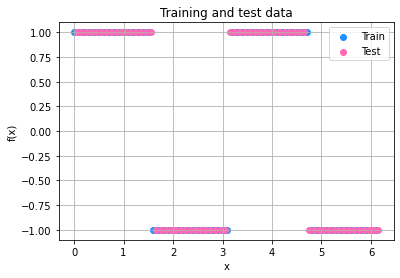

In [31]:
# Plot generated data
rbf.plot_data(X_train,X_test,f_train,f_test)

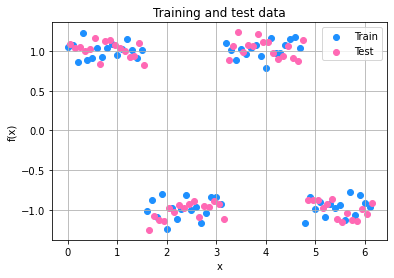

In [32]:
# Plot generated noisy data
rbf.plot_data(X_train,X_test,f_train_noisy,f_test_noisy)

In [33]:
# Define RBF Network Architecture
arch = [
    1, # Input dimensionality
    8, # Nodes per hidden layer
    1  # Output dimensionality
]
n = arch[1]
lr = 0.005
n_epochs = 200

In [34]:
# Create RBF Network
rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)

### Least Squares

In [35]:
# Initialize weigths
rbfnet.initialize_weights()

In [36]:
# Initialize RBF params
step = (x_range[1]-x_range[0])/n
sigmas = np.array([[0.5 for i in range(n)]]).T
mus = np.array([[step/2 + step*i for i in range(n)]]).T
rbfnet.initialize_rad_basis_fns(mus,sigmas)

In [37]:
# Train weights with LS method
rbfnet.least_squares(X_train,f_train_noisy)

In [38]:
# Approximate function samples
f_train_pred = rbfnet.forward_pass(X_train).T
f_test_pred = rbfnet.forward_pass(X_test).T

In [39]:
# Apply sgn() to outputs
f_train_pred_th = 2*(f_train_pred>=0)-1
f_test_pred_th = 2*(f_test_pred>=0)-1

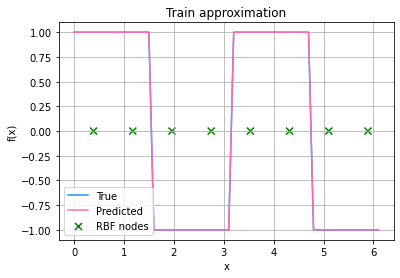

In [40]:
# Plot predicted vs actual output
title = 'Train approximation'
rbf.plot_series(rbfnet,X_train.T,f_train.T,f_train_pred_th.T,title)

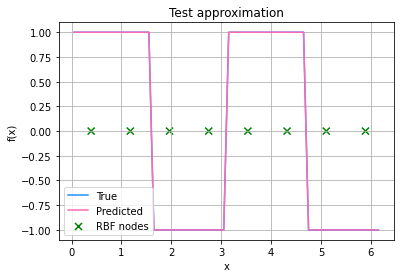

In [41]:
# Plot predicted vs actual output
title = 'Test approximation'
rbf.plot_series(rbfnet,X_test.T,f_test.T,f_test_pred_th.T,title)

In [42]:
# Compute residual error
res_error = rbf.residual_error(f_test,f_test_pred_th)
res_error

0.0

### Delta Rule

In [43]:
# Initialize weigths
rbfnet.initialize_weights()

In [44]:
# Initialize RBF params
step = (x_range[1]-x_range[0])/n
sigmas = np.array([[0.5 for i in range(n)]]).T
mus = np.array([[step/2 + step*i for i in range(n)]]).T
rbfnet.initialize_rad_basis_fns(mus,sigmas)

In [45]:
# Train weights with Delta Rule method
res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train,X_test,f_test,n_epochs)

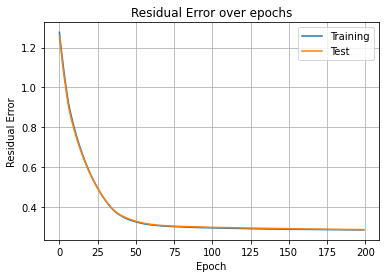

In [46]:
# Plot learning curves
rbf.plot_error(res_error_epochs,res_error_epochs_test,'Residual Error')

In [47]:
# Approximate function samples
f_train_pred = rbfnet.forward_pass(X_train).T
f_test_pred = rbfnet.forward_pass(X_test).T

In [48]:
# Apply sgn() to outputs
f_train_pred_th = 2*(f_train_pred>=0)-1
f_test_pred_th = 2*(f_test_pred>=0)-1

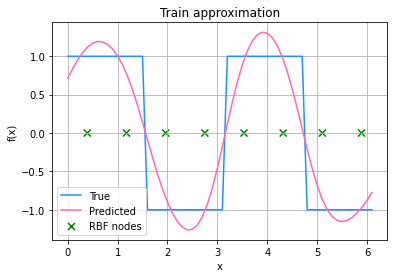

In [49]:
# Plot predicted vs actual output
title = 'Train approximation'
rbf.plot_series(rbfnet,X_train.T,f_train.T,f_train_pred.T,title)

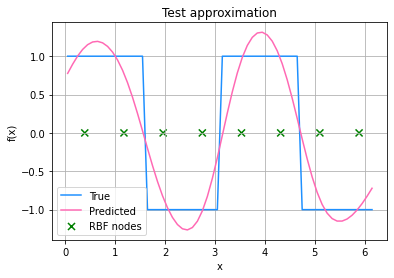

In [50]:
# Plot predicted vs actual output
title = 'Test approximation'
rbf.plot_series(rbfnet,X_test.T,f_test.T,f_test_pred.T,title)

In [51]:
# Compute residual error
res_error = rbf.residual_error(f_test,f_test_pred_th)
res_error

0.03225806451612903

### Comparison of Setups

In [53]:
# Comparison for Noisy Data
batch_res_errors, batch_res_errors_test = [],[]
seq_res_errors, seq_res_errors_test = [],[]
mlp_res_errors, mlp_res_errors_test = [],[]
archs, sigmas_used = [], []
ns = [2,4,8,16,32]
fixed_sigmas = [0.1,0.2,0.4,0.8,1.6]
lr = 0.05
n_epochs = 200
for n in ns :
    for sigma in fixed_sigmas :
        # Define RBF Network Architecture
        arch = [1,n,1]
        archs.append(str(arch[0])+'+'+str(arch[1])+'+'+str(arch[2]))
        sigmas_used.append(sigma)
        # Create RBF Network
        rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)
        # Initialize RBF params
        step = (x_range[1]-x_range[0])/n
        sigmas = np.array([[sigma for i in range(n)]]).T
        mus = np.array([[step/2 + step*i for i in range(n)]]).T
        rbfnet.initialize_rad_basis_fns(mus,sigmas)
        # Train weights with LS method
        rbfnet.initialize_weights()
        rbfnet.least_squares(X_train,f_train_noisy)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        batch_res_errors.append(rbf.residual_error(f_train,f_train_pred))
        batch_res_errors_test.append(rbf.residual_error(f_test,f_test_pred))
        # Train weights with Delta Rule method
        rbfnet.initialize_weights()
        res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train_noisy,X_test,f_test,n_epochs)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        seq_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        seq_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))
        # Train weights with MLP
        ann = mlp.NeuralNetwork(arch, mlp.activation_fn, mlp.activation_fn_der, True, 0.9, lr, n_epochs)
        ann.initialize_weights()
        epoch_mses, epoch_mses_valid = ann.train(X_train,f_train_noisy,X_test,f_test_noisy)
        # Approximate function samples
        f_train_pred = ann.forward_pass(X_train)
        f_test_pred = ann.forward_pass(X_test)
        # Append residual errors
        mlp_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        mlp_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))

KeyboardInterrupt: 

In [ ]:
# Comparison results
data = np.array([archs,sigmas_used,batch_res_errors,batch_res_errors_test,seq_res_errors,seq_res_errors_test,mlp_res_errors,mlp_res_errors_test]).T
df = pd.DataFrame(data,columns = ['arch','sigma','batch','batch_t','seq','seq_t','mlp','mlp_t'])
df = df.set_index(['arch', 'sigma'])
df = df.apply(pd.to_numeric)
df.style.background_gradient(cmap='YlOrRd',axis=None)

In [ ]:
# Comparison for non-Noisy Data
batch_res_errors, batch_res_errors_test = [],[]
seq_res_errors, seq_res_errors_test = [],[]
mlp_res_errors, mlp_res_errors_test = [],[]
archs, sigmas_used = [], []
ns = [2,4,8,16,32]
fixed_sigmas = [0.1,0.2,0.4,0.8,1.6]
lr = 0.05
n_epochs = 200
for n in ns :
    for sigma in fixed_sigmas :
        # Define RBF Network Architecture
        arch = [1,n,1]
        archs.append(str(arch[0])+'+'+str(arch[1])+'+'+str(arch[2]))
        sigmas_used.append(sigma)
        # Create RBF Network
        rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)
        # Initialize RBF params
        step = (x_range[1]-x_range[0])/n
        sigmas = np.array([[sigma for i in range(n)]]).T
        mus = np.array([[step/2 + step*i for i in range(n)]]).T
        rbfnet.initialize_rad_basis_fns(mus,sigmas)
        # Train weights with LS method
        rbfnet.initialize_weights()
        rbfnet.least_squares(X_train,f_train)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        batch_res_errors.append(rbf.residual_error(f_train,f_train_pred))
        batch_res_errors_test.append(rbf.residual_error(f_test,f_test_pred))
        # Train weights with Delta Rule method
        rbfnet.initialize_weights()
        res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train,X_test,f_test,n_epochs)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        seq_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        seq_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))
        # Train weights with MLP
        ann = mlp.NeuralNetwork(arch, mlp.activation_fn, mlp.activation_fn_der, True, 0.9, lr, n_epochs)
        ann.initialize_weights()
        epoch_mses, epoch_mses_valid = ann.train(X_train,f_train,X_test,f_test_noisy)
        # Approximate function samples
        f_train_pred = ann.forward_pass(X_train)
        f_test_pred = ann.forward_pass(X_test)
        # Append residual errors
        mlp_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        mlp_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))

In [167]:
# Comparison results
data = np.array([archs,sigmas_used,batch_res_errors,batch_res_errors_test,seq_res_errors,seq_res_errors_test,mlp_res_errors,mlp_res_errors_test]).T
df = pd.DataFrame(data,columns = ['arch','sigma','batch','batch_t','seq','seq_t','mlp','mlp_t'])
df = df.set_index(['arch', 'sigma'])
df = df.apply(pd.to_numeric)
df.style.background_gradient(cmap='YlOrRd',axis=None)

In [168]:
# Comparison for Noisy Data - Assign RBF centers randomly
batch_res_errors, batch_res_errors_test = [],[]
seq_res_errors, seq_res_errors_test = [],[]
mlp_res_errors, mlp_res_errors_test = [],[]
archs, sigmas_used = [], []
ns = [2,4,8,16,32]
fixed_sigmas = [0.1,0.2,0.4,0.8,1.6]
lr = 0.05
n_epochs = 200
for n in ns :
    for sigma in fixed_sigmas :
        # Define RBF Network Architecture
        arch = [1,n,1]
        archs.append(str(arch[0])+'+'+str(arch[1])+'+'+str(arch[2]))
        sigmas_used.append(sigma)
        # Create RBF Network
        rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)
        # Initialize RBF params
        sigmas = np.array([[sigma for i in range(n)]]).T
        mus = np.array([np.random.choice(X_train.reshape(-1),size=n,replace=False)]).T
        rbfnet.initialize_rad_basis_fns(mus,sigmas)
        # Train weights with LS method
        rbfnet.initialize_weights()
        rbfnet.least_squares(X_train,f_train_noisy)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        batch_res_errors.append(rbf.residual_error(f_train,f_train_pred))
        batch_res_errors_test.append(rbf.residual_error(f_test,f_test_pred))
        # Train weights with Delta Rule method
        rbfnet.initialize_weights()
        res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train_noisy,X_test,f_test,n_epochs)
        # Approximate function samples
        f_train_pred = rbfnet.forward_pass(X_train).T
        f_test_pred = rbfnet.forward_pass(X_test).T
        # Append residual errors
        seq_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        seq_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))
        # Train weights with MLP
        ann = mlp.NeuralNetwork(arch, mlp.activation_fn, mlp.activation_fn_der, True, 0.9, lr, n_epochs)
        ann.initialize_weights()
        epoch_mses, epoch_mses_valid = ann.train(X_train,f_train_noisy,X_test,f_test_noisy)
        # Approximate function samples
        f_train_pred = ann.forward_pass(X_train)
        f_test_pred = ann.forward_pass(X_test)
        # Append residual errors
        mlp_res_errors.append(rbf.residual_error(f_train,f_test_pred))
        mlp_res_errors_test.append(rbf.residual_error(f_train,f_test_pred))

In [169]:
# Comparison results
data = np.array([archs,sigmas_used,batch_res_errors,batch_res_errors_test,seq_res_errors,seq_res_errors_test,mlp_res_errors,mlp_res_errors_test]).T
df = pd.DataFrame(data,columns = ['arch','sigma','batch','batch_t','seq','seq_t','mlp','mlp_t'])
df = df.set_index(['arch', 'sigma'])
df = df.apply(pd.to_numeric)
df.style.background_gradient(cmap='YlOrRd',axis=None)

## Ballistic Experiments

In [2]:
# Load data
train_data = pd.read_csv('data/ballist.dat',sep=' |\t',engine='python')
test_data = pd.read_csv('data/balltest.dat',sep=' |\t',engine='python')

In [3]:
# Transform into numpy matrices
X_train = train_data.to_numpy().T[:2,:]
f_train = train_data.to_numpy().T[2:,:]
X_test = test_data.to_numpy().T[:2,:]
f_test = test_data.to_numpy().T[2:,:]

In [64]:
# Define RBF Network Architecture
arch = [
    2, # Input dimensionality
    25, # Nodes per hidden layer
    2  # Output dimensionality
]
n = arch[1]
lr = 0.05
n_epochs = 400

In [65]:
# Create RBF Network
rbfnet = rbf.RBF(arch,rbf.gaussian_tf,lr,n_epochs)

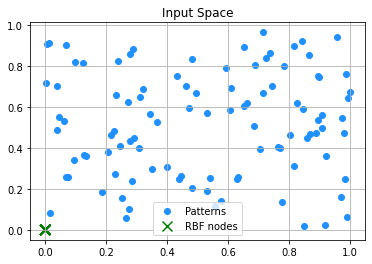

In [66]:
# Plot training input space
rbf.plot_input_space(rbfnet,X_train)

In [67]:
# Initialize weigths
rbfnet.initialize_weights()

In [68]:
# Initialize and train RBF params
sigmas = np.array([[1 for i in range(n)]]).T
random_indices = np.random.choice(n,size=n,replace=False)
mus = X_train[:,random_indices].T
rbfnet.initialize_rad_basis_fns(np.copy(mus),np.copy(sigmas))
rbfnet.winner_takes_all(X_train,lr,unique_winner=False)

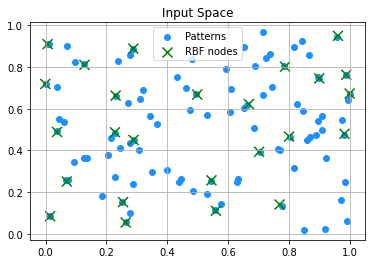

In [69]:
# Plot training input space
rbf.plot_input_space(rbfnet,X_train)

In [71]:
# Train weights with Delta Rule method
res_error_epochs, res_error_epochs_test = rbfnet.delta_rule(X_train,f_train,X_test,f_test,n_epochs)

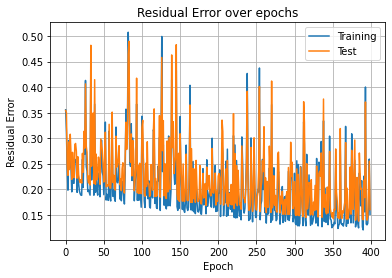

In [72]:
# Plot learning curves
rbf.plot_error(res_error_epochs,res_error_epochs_test,'Residual Error')

In [73]:
# Approximate function samples
f_train_pred = rbfnet.forward_pass(X_train).T
f_test_pred = rbfnet.forward_pass(X_test).T

Text(0.5, 1.0, 'Training output - Distance')

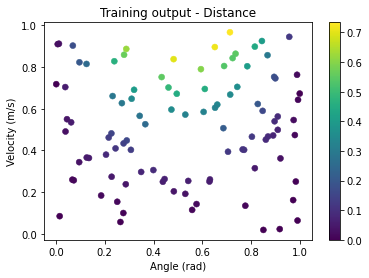

In [74]:
# Training output - Distance
fig, ax = plt.subplots()
sc = ax.scatter(X_train[0,:], X_train[1,:], c=f_train[0,:], cmap='viridis', linewidth=0.5)
plt.colorbar(sc)
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Training output - Distance')

Text(0.5, 1.0, 'Training output - Distance')

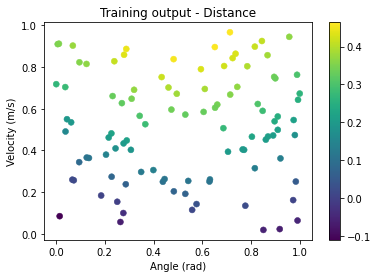

In [75]:
# Training predicted output - Distance
fig, ax = plt.subplots()
sc = ax.scatter(X_train[0,:], X_train[1,:], c=f_train_pred[0,:], cmap='viridis', linewidth=0.5)
plt.colorbar(sc)
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Training predicted output - Distance')

Text(0.5, 1.0, 'Training output - Height')

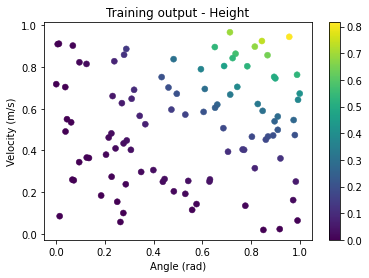

In [76]:
# Training output - Height
fig, ax = plt.subplots()
sc = ax.scatter(X_train[0,:], X_train[1,:], c=f_train[1,:], cmap='viridis', linewidth=0.5)
plt.colorbar(sc)
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Training output - Height')

Text(0.5, 1.0, 'Training output - Height')

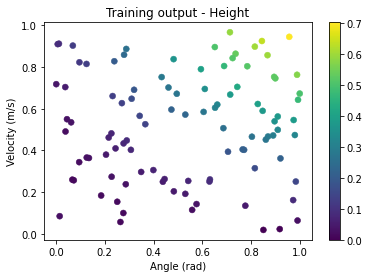

In [77]:
# Training predicted output - Height
fig, ax = plt.subplots()
sc = ax.scatter(X_train[0,:], X_train[1,:], c=f_train_pred[1,:], cmap='viridis', linewidth=0.5)
plt.colorbar(sc)
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Training predicted output - Height')

Text(0.5, 1.0, 'Test output - Distance')

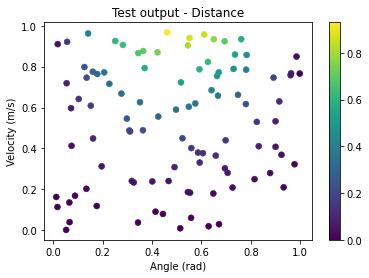

In [78]:
# Training output - Distance
fig, ax = plt.subplots()
sc = ax.scatter(X_test[0,:], X_test[1,:], c=f_test[0,:], cmap='viridis', linewidth=0.5)
plt.colorbar(sc)
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Test output - Distance')

Text(0.5, 1.0, 'Test predicted output - Distance')

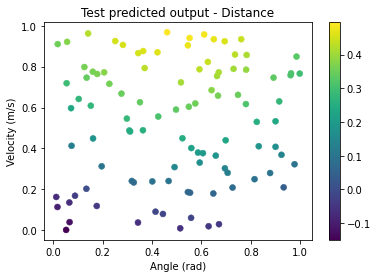

In [83]:
# Training predicted output - Distance
fig, ax = plt.subplots()
sc = ax.scatter(X_test[0,:], X_test[1,:], c=f_test_pred[0,:], cmap='viridis', linewidth=0.5)
plt.colorbar(sc)
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Test predicted output - Distance')

Text(0.5, 1.0, 'Test output - Height')

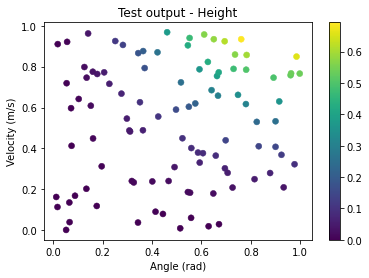

In [80]:
# Training output - Height
fig, ax = plt.subplots()
sc = ax.scatter(X_test[0,:], X_test[1,:], c=f_test[1,:], cmap='viridis', linewidth=0.5)
plt.colorbar(sc)
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Test output - Height')

Text(0.5, 1.0, 'Test predicted output - Height')

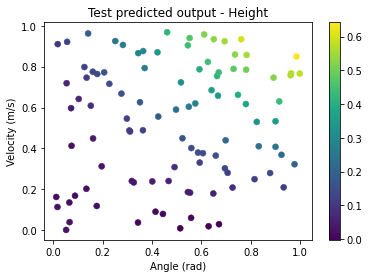

In [82]:
# Training predicted output - Height
fig, ax = plt.subplots()
sc = ax.scatter(X_test[0,:], X_test[1,:], c=f_test_pred[1,:], cmap='viridis', linewidth=0.5)
plt.colorbar(sc)
ax.set_xlabel('Angle (rad)')
ax.set_ylabel('Velocity (m/s)')
ax.set_title('Test predicted output - Height')